<span style="float:left;">Licence CC BY-NC-ND</span><span style="float:right;">Thierry Parmentelat &amp; Arnaud Legout&nbsp;<img src="media/both-logos-small-alpha.png" style="display:inline"></span><br/>

# écosystème data science

### un rapide survol

* `numpy`
* `matplotlib`
* `pandas`

# `numpy`

In [45]:
import numpy

# tableaux

In [46]:
# une liste de listes
mat1 = [
  [11, 12, 13],
  [21, 22, 23],
]
mat1

[[11, 12, 13], [21, 22, 23]]

In [47]:
# un dictionnaire indexé par des tuples
mat2 = { (i,j) : i+10*j
           for i in range(1, 3)
           for j in range(1, 4)}

mat2

{(1, 1): 11, (1, 2): 21, (1, 3): 31, (2, 1): 12, (2, 2): 22, (2, 3): 32}

In [48]:
mat1[2-1][3-1]

23

In [49]:
mat2[ 2, 3 ]

32

# langage compilé

### tableau homogène : toutes les cellules sont de même type

### dimensions connues

# accès direct

[animation](w7-directaccess/index.html)

# python 

# *vs* `numpy`

##### container (`list` / `dict` / `set`)
* hétérogène par construction
* de taille variable

##### `ndarray`
* homogène
* de taille fixe

# benchmark 1 - liste

In [50]:
size = 10**4

import math

# l comme liste
l = [float(i) for i in range(size)]

In [51]:
import numpy as np

# n comme numpy
n = np.array(l)

type(n)

numpy.ndarray

In [52]:
%%timeit -n 50
[math.cos(x) for x in l]

1.31 ms ± 122 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [53]:
%%timeit -n 50
np.cos(n)

124 µs ± 6.1 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


# benchmark 2 - dict / tuple

In [54]:
size = 100
# d comme dict
d = { (i, j) : float(size*i + j)
     for j in range(size)
     for i in range(size)}
d[2, 4]

204.0

In [55]:
# temporaire pour créer le array
l = [ [float(size*i+j) 
       for j in range(size)]
      for i in range(size)]
n = np.array(l)
n[2, 4]

204.0

In [56]:
%%timeit -n 50
{ tuple : math.cos(value) 
  for tuple, value in d.items()}

1.91 ms ± 99.4 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [57]:
%%timeit -n 50
np.cos(n)

127 µs ± 11 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


# tableau = vue

In [58]:
a = np.array( [ [0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]],
               dtype=float)

In [59]:
a

array([[  0.,   1.,   2.,   3.],
       [  4.,   5.,   6.,   7.],
       [  8.,   9.,  10.,  11.]])

In [60]:
# la forme du tableau, c'est 
# le point de vue de a sur son buffer
a.shape

(3, 4)

In [61]:
b = a.reshape( (6, 2))
b

array([[  0.,   1.],
       [  2.,   3.],
       [  4.,   5.],
       [  6.,   7.],
       [  8.,   9.],
       [ 10.,  11.]])

In [62]:
a[1, 2] = 600.

In [63]:
 b

array([[   0.,    1.],
       [   2.,    3.],
       [   4.,    5.],
       [ 600.,    7.],
       [   8.,    9.],
       [  10.,   11.]])

# tableau = vue ...

[animation](w7-view/index.html)

# `numpy`

In [68]:
import matplotlib.pyplot as plt

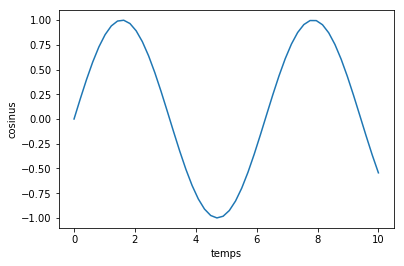

In [70]:
X = np.linspace(0, 10)
Y = np.sin(X)
plt.plot(X, Y)
plt.xlabel("temps")
plt.ylabel('cosinus')
plt.show()

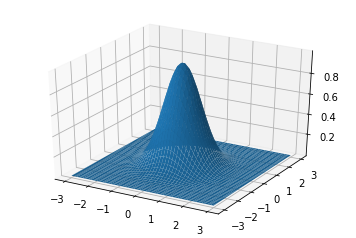

In [77]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

scope = 3
xs = np.linspace(-scope, scope)
ys = np.linspace(-scope, scope)
X, Y = np.meshgrid(xs, ys)
Z = np.exp(-(X**2+Y**2))
ax.plot_surface(X, Y, Z)
plt.show()

In [ ]:
%matplotlib notebook
plt.ion()

# pandas

# conclusion

### motivations

* meilleures performances
* meilleure gestion de la mémoire
* au prix de légères limitations sans conséquence

### références partagées

* un tableau est une vue sur des données
* la géométrie fait partie de la vue et pas des données